In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [2]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [3]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
xTrain = xTrain.reshape(60000,784).astype('float32')/255
xTest = xTest.reshape(10000,784).astype('float32')/255

In [5]:
yTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# onehot encoding
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [7]:
# 2. 모델 구성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [8]:
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
# 4. 모델 학습
hist = model.fit(xTrain, yTrain, batch_size = 256, epochs=50)
# fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)

Epoch 1/50
60000/60000 [==============================] - 1s 12us/step - loss: 2.0887 - accuracy: 0.3577
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 1.0984 - accuracy: 0.7307
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.5889 - accuracy: 0.8328
Epoch 4/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4667 - accuracy: 0.8652
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.4094 - accuracy: 0.8814
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.3739 - accuracy: 0.8922
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.3476 - accuracy: 0.9003
Epoch 8/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.3269 - accuracy: 0.9063
Epoch 9/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.3099 - accuracy: 0.9101
Epoch 10/50
60000/60000 [==============================

KeyboardInterrupt: 

In [10]:
# 5. 훈련셋, 검증셋으로 cost 및 accuracy 확인
print(hist.history['loss'])
print(hist.history['accuracy'])
# print(hist.history['val_loss'])

NameError: name 'hist' is not defined

In [11]:
import pandas as pd
pd.Series(hist.history['loss']).plot()
# pd.Series(hist.history['val_loss']).plot()

NameError: name 'hist' is not defined

In [12]:
# 6. 모델 평가
model.evaluate(xTest, yTest, batch_size=32)

10000/10000 [==============================] - 0s 23us/step


[0.18650195754915475, 0.9458000063896179]

In [13]:
xhat = xTest[0:1]
yhat = model.predict(xhat)
print(yhat)

[[9.7253436e-04 1.3362978e-05 3.0084630e-03 3.2448219e-03 4.5640380e-07
  1.8103773e-04 1.5522426e-08 9.9194920e-01 6.4175336e-05 5.6588347e-04]]


Train Test 나누기

In [14]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [15]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
xTrain = xTrain.reshape(60000,784).astype('float32')/255
xTest = xTest.reshape(10000,784).astype('float32')/255

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xTrain, yTrain, test_size=1/6)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 784) (10000, 784) (50000,) (10000,)


In [19]:
import numpy as np
tri = np.random.choice(50000,700)
vri = np.random.choice(10000,300)

In [20]:
xTrain_tri = X_train[tri]
yTrain_tri = y_train[tri]
xVal = X_test[vri]
yVal = y_test[vri]

In [21]:
yTrain_tri = np_utils.to_categorical(yTrain_tri)
yVal = np_utils.to_categorical(yVal)
yTest = np_utils.to_categorical(yTest)

In [22]:
model=Sequential()
model.add(Dense(input_dim=28*28, units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [23]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=50)
# EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
hist = model.fit(xTrain_tri, yTrain_tri, epochs=3000, batch_size=128,validation_data=(xVal, yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 177us/step - loss: 2.3065 - accuracy: 0.0986 - val_loss: 2.3054 - val_accuracy: 0.1333
Epoch 2/3000
700/700 [==============================] - 0s 41us/step - loss: 2.3030 - accuracy: 0.0971 - val_loss: 2.3029 - val_accuracy: 0.1367
Epoch 3/3000
700/700 [==============================] - 0s 44us/step - loss: 2.2997 - accuracy: 0.1029 - val_loss: 2.3005 - val_accuracy: 0.1367
Epoch 4/3000
700/700 [==============================] - 0s 44us/step - loss: 2.2966 - accuracy: 0.1057 - val_loss: 2.2982 - val_accuracy: 0.1400
Epoch 5/3000
700/700 [==============================] - 0s 44us/step - loss: 2.2935 - accuracy: 0.1129 - val_loss: 2.2958 - val_accuracy: 0.1300
Epoch 6/3000
700/700 [==============================] - 0s 41us/step - loss: 2.2904 - accuracy: 0.1143 - val_loss: 2.2933 - val_accuracy: 0.1400
Epoch 7/3000
700/700 [==============================] - 0s 41us/step - loss: 2.2874

Epoch 57/3000
700/700 [==============================] - 0s 40us/step - loss: 1.4748 - accuracy: 0.6986 - val_loss: 1.4685 - val_accuracy: 0.6500
Epoch 58/3000
700/700 [==============================] - 0s 43us/step - loss: 1.4214 - accuracy: 0.7100 - val_loss: 1.4237 - val_accuracy: 0.6433
Epoch 59/3000
700/700 [==============================] - 0s 46us/step - loss: 1.3768 - accuracy: 0.7057 - val_loss: 1.3790 - val_accuracy: 0.6700
Epoch 60/3000
700/700 [==============================] - 0s 40us/step - loss: 1.3265 - accuracy: 0.7057 - val_loss: 1.3270 - val_accuracy: 0.6800
Epoch 61/3000
700/700 [==============================] - 0s 43us/step - loss: 1.2771 - accuracy: 0.7171 - val_loss: 1.2760 - val_accuracy: 0.7200
Epoch 62/3000
700/700 [==============================] - 0s 47us/step - loss: 1.2291 - accuracy: 0.7443 - val_loss: 1.2249 - val_accuracy: 0.7067
Epoch 63/3000
700/700 [==============================] - 0s 54us/step - loss: 1.1824 - accuracy: 0.7314 - val_loss: 1.1785 -

700/700 [==============================] - 0s 36us/step - loss: 0.3382 - accuracy: 0.9129 - val_loss: 0.4691 - val_accuracy: 0.8500
Epoch 114/3000
700/700 [==============================] - 0s 38us/step - loss: 0.3194 - accuracy: 0.9186 - val_loss: 0.4589 - val_accuracy: 0.8600
Epoch 115/3000
700/700 [==============================] - 0s 36us/step - loss: 0.3213 - accuracy: 0.9143 - val_loss: 0.4843 - val_accuracy: 0.8467
Epoch 116/3000
700/700 [==============================] - 0s 34us/step - loss: 0.3093 - accuracy: 0.9229 - val_loss: 0.4644 - val_accuracy: 0.8600
Epoch 117/3000
700/700 [==============================] - 0s 36us/step - loss: 0.2987 - accuracy: 0.9243 - val_loss: 0.4401 - val_accuracy: 0.8633
Epoch 118/3000
700/700 [==============================] - 0s 36us/step - loss: 0.2896 - accuracy: 0.9271 - val_loss: 0.4561 - val_accuracy: 0.8533
Epoch 119/3000
700/700 [==============================] - 0s 37us/step - loss: 0.2971 - accuracy: 0.9300 - val_loss: 0.4426 - val_acc

Epoch 169/3000
700/700 [==============================] - 0s 38us/step - loss: 0.1141 - accuracy: 0.9786 - val_loss: 0.4004 - val_accuracy: 0.8767
Epoch 170/3000
700/700 [==============================] - 0s 40us/step - loss: 0.1187 - accuracy: 0.9800 - val_loss: 0.3910 - val_accuracy: 0.8900
Epoch 171/3000
700/700 [==============================] - 0s 37us/step - loss: 0.1114 - accuracy: 0.9843 - val_loss: 0.3767 - val_accuracy: 0.8833
Epoch 172/3000
700/700 [==============================] - 0s 41us/step - loss: 0.1169 - accuracy: 0.9786 - val_loss: 0.3928 - val_accuracy: 0.8700
Epoch 173/3000
700/700 [==============================] - 0s 40us/step - loss: 0.1082 - accuracy: 0.9829 - val_loss: 0.3906 - val_accuracy: 0.8867
Epoch 174/3000
700/700 [==============================] - 0s 40us/step - loss: 0.1078 - accuracy: 0.9786 - val_loss: 0.3893 - val_accuracy: 0.8800
Epoch 175/3000
700/700 [==============================] - 0s 38us/step - loss: 0.1030 - accuracy: 0.9843 - val_loss: 0

Epoch 225/3000
700/700 [==============================] - 0s 36us/step - loss: 0.0424 - accuracy: 0.9971 - val_loss: 0.3919 - val_accuracy: 0.8867
Epoch 226/3000
700/700 [==============================] - 0s 38us/step - loss: 0.0414 - accuracy: 0.9986 - val_loss: 0.3863 - val_accuracy: 0.9000
Epoch 227/3000
700/700 [==============================] - 0s 37us/step - loss: 0.0415 - accuracy: 0.9986 - val_loss: 0.3855 - val_accuracy: 0.8967
Epoch 228/3000
700/700 [==============================] - 0s 37us/step - loss: 0.0404 - accuracy: 0.9986 - val_loss: 0.3862 - val_accuracy: 0.9000
Epoch 229/3000
700/700 [==============================] - 0s 37us/step - loss: 0.0394 - accuracy: 0.9971 - val_loss: 0.3829 - val_accuracy: 0.8967
Epoch 230/3000
700/700 [==============================] - 0s 38us/step - loss: 0.0382 - accuracy: 0.9986 - val_loss: 0.3854 - val_accuracy: 0.9033
Epoch 231/3000
700/700 [==============================] - 0s 36us/step - loss: 0.0383 - accuracy: 0.9986 - val_loss: 0

In [26]:
import matplotlib.pyplot as plt

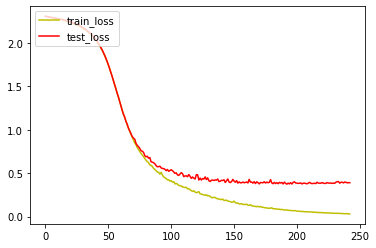

In [27]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test_loss')
loss_ax.legend(loc='upper left')
plt.show()

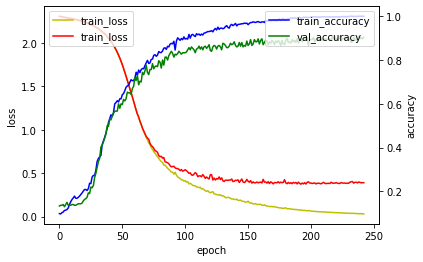

In [28]:
figs, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # 동일안 axis를 만들 수 있음
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='train_loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val_accuracy')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [29]:
res = model.evaluate(xTest, yTest, batch_size=64)
print('cost : ', res[0])
print('accuracy : ', res[1])

10000/10000 [==============================] - 0s 20us/step
cost :  0.5259587879300117
accuracy :  0.8593000173568726


In [30]:
import tensorflow

In [31]:
from tensorflow.python.client import device_lib

In [32]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15878108212978378680]

폐암 데이터 활용 실용

In [36]:
import tensorflow.compat.v1 as tf
import numpy as np

In [37]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

In [38]:
data = np.loadtxt(r'C:\Users\chan\Desktop\dataset\ThoraricSurgery.csv', delimiter=',')

In [39]:
data

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [40]:
x = data[:,:17]
y = data[:,17]

In [41]:
model = Sequential()
model.add(Dense(32, input_shape=(17,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 노드 1 : 0또는 1을 나타내는 값이 1개 있다는 의미

In [42]:
model.compile(loss='mean_squared_error',
             optimizer='adam', metrics=['accuracy'] )

In [43]:
model.fit(x,y,epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 5s 10ms/step - loss: 0.1496 - accuracy: 0.8426
Epoch 2/30
470/470 [==============================] - 4s 10ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 3/30
 90/470 [====>.........................] - ETA: 3s - loss: 0.1000 - accuracy: 0.9000

KeyboardInterrupt: 

In [ ]:
model.evaluate(x,y)

In [46]:
model.predict_classes(x)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [47]:
xy = np.loadtxt(r"C:\Users\chan\Desktop\dataset" + '\data-03-diabetes.csv',delimiter=',')
xdata = xy[:,0:-1]
ydata = xy[:,[-1]] # -1을 []로 묶어주어야 열로 잡힘

In [48]:
print(xdata.shape, ydata.shape)

(759, 8) (759, 1)


### multinomial classification

각 class 에 대해서 분류하는 분류기준이 필요함

softmax_cross_entropy with logistic regressions
A : 분류를 위한 w1*x1+b1
B : 분류를 위한 w2*x2+b2
C : 분류를 위한 w3*x3+b3
이런 식으로 3개가 필요함


In [49]:
xdata.shape

(759, 8)

In [68]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [69]:
w = tf.Variable(tf.random_normal([8,1]))
b = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32, shape=[None, 8])
y = tf.placeholder(tf.float32, shape=[None, 1])

In [70]:
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [71]:
train = tf.train.GradientDescentOptimizer(1e-2).minimize(cost)

In [72]:
predicted = tf.cast(hf>0.5, dtype=tf.float32)

In [73]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [74]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [75]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv, _ = sess.run([cost, train], feed_dict={x:xdata, y:ydata})
        if step%200 == 0:
            print(step, cv)
    hv,pv,av = sess.run([hf, predicted, accuracy],
                       feed_dict={x:xdata, y:ydata})
    print(hv, pv, av)

0 1.1407136
200 0.69895405
400 0.6129875
600 0.58966464
800 0.5775765
1000 0.5683252
1200 0.56033146
1400 0.5532171
1600 0.5468364
1800 0.5410971
2000 0.5359249
2200 0.5312555
2400 0.527033
2600 0.52320784
2800 0.5197369
3000 0.51658195
3200 0.5137094
3400 0.51108956
3600 0.5086962
3800 0.50650626
4000 0.5044991
4200 0.50265646
4400 0.5009622
4600 0.49940205
4800 0.49796295
5000 0.4966337
5200 0.49540386
5400 0.49426457
5600 0.49320737
5800 0.49222496
6000 0.49131086
6200 0.49045902
6400 0.48966414
6600 0.48892146
6800 0.48822647
7000 0.4875754
7200 0.4869646
7400 0.4863909
7600 0.48585123
7800 0.48534313
8000 0.4848641
8200 0.48441195
8400 0.4839845
8600 0.48358017
8800 0.48319724
9000 0.48283404
9200 0.48248935
9400 0.48216176
9600 0.4818502
9800 0.48155352
10000 0.48127064
[[0.43019226]
 [0.9499494 ]
 [0.14363043]
 [0.9513266 ]
 [0.14334138]
 [0.7518556 ]
 [0.937652  ]
 [0.5681068 ]
 [0.23565125]
 [0.55907446]
 [0.7555232 ]
 [0.1374787 ]
 [0.2355926 ]
 [0.39964998]
 [0.7416595 ]
 [0

In [77]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2353618095034279500]